In [19]:
from model import Fitness

# Data visualization tools.
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable("vegafusion")
alt.renderers.enable("jupyter")

RendererRegistry.enable('jupyter')

In [2]:
modelNone = Fitness(50, 20, 20, abundance=0.5, mutation=False, choosy=False)
modelC = Fitness(50, 20, 20, abundance=0.5, mutation=False, choosy=True)
modelM = Fitness(50, 20, 20, abundance=0.5, mutation=True, choosy=False)
modelMC = Fitness(50, 20, 20, abundance=0.5, mutation=True, choosy=True)

for _ in range(8000):
    modelNone.step()
    modelC.step()
    modelM.step()
    modelMC.step()

modelNone_data = modelNone.datacollector.get_model_vars_dataframe()
modelNone_agent_data = modelNone.datacollector.get_agent_vars_dataframe()

modelC_data = modelC.datacollector.get_model_vars_dataframe()
modelC_agent_data = modelC.datacollector.get_agent_vars_dataframe()

modelM_data = modelM.datacollector.get_model_vars_dataframe()
modelM_agent_data = modelM.datacollector.get_agent_vars_dataframe()

modelMC_data = modelMC.datacollector.get_model_vars_dataframe()
modelMC_agent_data = modelMC.datacollector.get_agent_vars_dataframe()

In [ ]:
# print(agent_data)

# agent_data.to_csv('agent_data_output.csv')

In [ ]:
model_names = ["No Mutation No Choice", "Choice", "Mutation", "Mutation Choice"]
models = [modelNone_data, modelC_data, modelM_data, modelMC_data]

for i, model in enumerate(models):
    model.index.rename('step', inplace=True)
    model.reset_index(inplace=True)
    models[i] = model.assign(model_type=model_names[i])

In [39]:
model_data_full = pd.concat(models)
model_data_full

,step,Avg Fitness,Population,Carriers,Givers,model_type
0,0,0.038162,50,25,25,No Mutation No Choice
1,1,0.038162,50,25,25,No Mutation No Choice
2,2,0.038162,50,25,25,No Mutation No Choice
3,3,0.038162,50,25,25,No Mutation No Choice
4,4,0.038162,50,25,25,No Mutation No Choice
...,...,...,...,...,...,...
7301,7301,1.953630,3135,518,2617,Mutation Choice
7302,7302,1.953630,3135,518,2617,Mutation Choice
7303,7303,1.953578,3134,517,2617,Mutation Choice
7304,7304,1.953578,3134,517,2617,Mutation Choice


<Axes: xlabel='step', ylabel='Avg Fitness'>

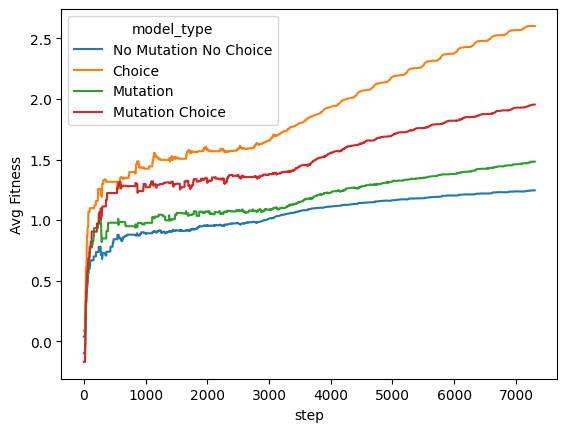

In [42]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Avg Fitness",
    hue="model_type"
)


<Axes: xlabel='step', ylabel='Population'>

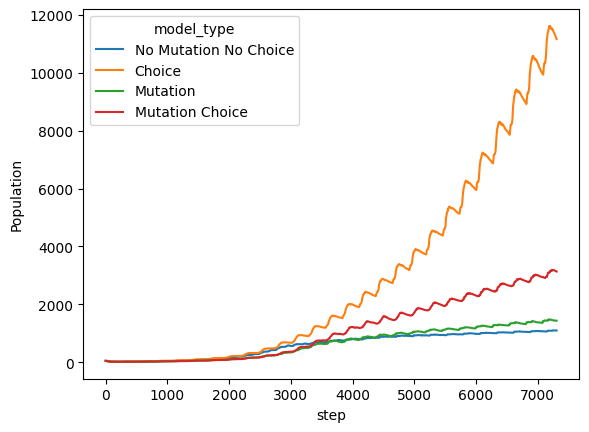

In [43]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Population",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='Carriers'>

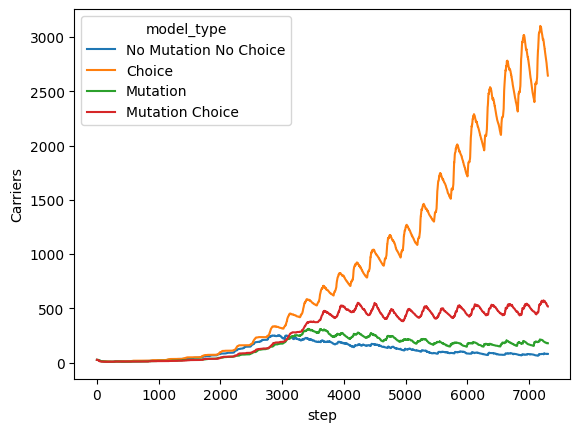

In [44]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Carriers",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='Givers'>

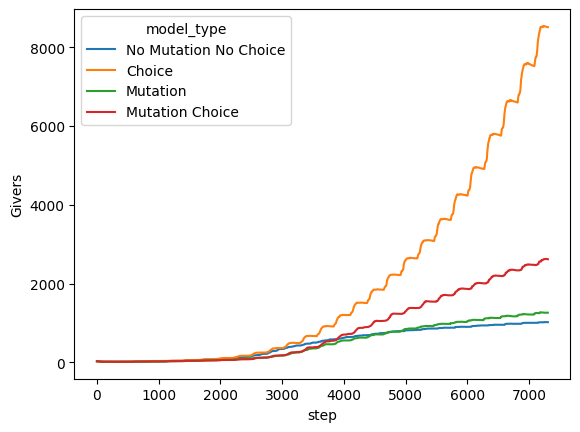

In [45]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Givers",
    hue="model_type"
)

In [46]:
alt.Chart(modelC_agent_data.loc[0, ["Fitness", "Role"]]).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X("Fitness:Q").bin(maxbins=20),
    alt.Y('count()').stack(None),
    color='Role:N'
)

JupyterChart()

In [47]:
alt.Chart(modelC_agent_data.loc[3000, ["Fitness", "Role"]]).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X("Fitness:Q").bin(maxbins=20),
    alt.Y('count()').stack(None),
    color='Role:N'
)

JupyterChart()

In [48]:
alt.Chart(modelC_agent_data.loc[8000, ["Fitness", "Role"]]).mark_bar(
    opacity=0.7,
    binSpacing=0
).encode(
    alt.X("Fitness:Q").bin(maxbins=20),
    alt.Y('count()').stack(None),
    color='Role:N'
)

JupyterChart()